#Tensorflow:Basics


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.version)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
#@title Creating Tensors
string = tf.Variable("this is a string",tf.string)
number = tf.Variable(324,tf.int32)
floating = tf.Variable(1.65842,tf.float64)


##Rank/Degree of Tensors
Rank of a tensor signifies the number of axis/dimension of a tensor

In [ ]:
rank_1_tensor = tf.Variable([1,2,3,4],dtype = tf.int32)
rank_2_tensor = tf.Variable([[1,2,3],[4,5,6]],tf.int32)
rank_3_tensor = tf.ones([2,3,3],tf.int32)

In [ ]:
print(rank_1_tensor)
print(rank_2_tensor)
print(rank_3_tensor)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
tf.Tensor(
[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]], shape=(2, 3, 3), dtype=int32)


In [ ]:
#@title Determining rank of a tensor
print(tf.rank(rank_1_tensor))
print(tf.rank(rank_2_tensor))
print(tf.rank(rank_3_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


## Shape of Tensors
Shape of a tensor is simply the number of elements that exist in each dimension

In [ ]:
tensor_a = tf.Variable([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]],tf.int64)
display(tensor_a)
print(tf.rank(tensor_a))
print(tensor_a.shape)

<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

tf.Tensor(3, shape=(), dtype=int32)
(2, 2, 3)


## Changing Shape
The number of elements in a tensor is the product of sizes of all it's shapes. There are often many shapes that have the same number of elements, making it convenient to be able to change the shape of a tensor.

In [ ]:
tensor1 = tf.ones([1,2,3]) #Tensor of rank 3, conttaning 6 elements
tensor2= tf.reshape(tensor1,[2,3,1]) #Reshaping the above tensor to [2,3,1]
tensor3 = tf.reshape(tensor2,[3,-1]) #-1 tells the tensor to calculate the dimension of the tensor given 3 as one of the dimension
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


## Slicing Tensors
To slice elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value references a different dimension of a tensor


In [ ]:
matrix=[[1,2,3,4,5],
        [6,7,8,9,10],
        [11,12,13,14,15],
        [16,17,18,19,20],
        [21,22,23,24,25]]
tensor_4 = tf.Variable(matrix,tf.int64)
print(tensor_4)
print(tf.rank(tensor_4))
print(tensor_4.shape)

<tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]], dtype=int32)>
tf.Tensor(2, shape=(), dtype=int32)
(5, 5)


In [ ]:
#@title Slicing on tensor_4
first_ele = tensor_4[0,0].numpy()
print(first_ele)
first_row = tensor_4[0,:].numpy()
print(first_row)
first_col = tensor_4[:,0].numpy()
print(first_col)
col_1_in_row_2_and_3 = tensor_4[1:3,0].numpy()
print(col_1_in_row_2_and_3)

1
[1 2 3 4 5]
[ 1  6 11 16 21]
[ 6 11]


In [ ]:
import tensorflow as tf
#@title Practice
x = tf.Variable([1,2,3,4],dtype = tf.int32)
print(tf.rank(x))

tf.Tensor(1, shape=(), dtype=int32)


# Regression Model
One layer model with one neuron and one input



In [ ]:
#Defining and compiling the model using stochastic gradient descent optimizer and loss function MSE
model = tf.keras.Sequential([keras.layers.Dense(units = 1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')


In [ ]:
#Input data
X = np.array([-1,0,1,2,3,4],dtype = float)
Y = np.array([-3,-1,1,3,5,7],dtype = float)


In [ ]:
#Model Fitting
model.fit(X,Y, epochs = 500)

In [ ]:
#Predicting new value
print(model.predict([10]))

1/1 [==============================] - 0s 96ms/step
[[18.98019]]


In [ ]:
#@title Housing price prediction
model_house = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,input_shape = [1])])
model_house.compile(optimizer = 'sgd',loss='mean_squared_error')
X_house = np.array([1,2,3,4,5,6],dtype = float)
Y_house= np.array([1,1.5,2,2.5,3,3.5],dtype = float)
model_house.fit(X_house,Y_house,epochs = 1000)


In [ ]:
#Prediction
model_house.predict([7])

1/1 [==============================] - 0s 35ms/step


array([[4.00405]], dtype=float32)

# Computer Vision
Image classififcation problem using MNIST_fashion Dataset

In [ ]:
#@title Loading Data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()


In [ ]:
training_images.shape

(60000, 28, 28)

3
[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 

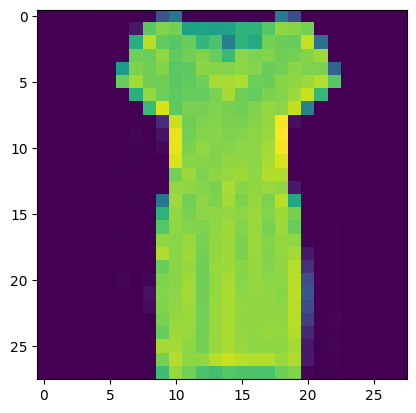

In [ ]:
plt.imshow(training_images[20])
print(training_labels[20])
print(training_images[20])


In [ ]:
#For Neural network to be applied easily it's better to normalize the data between [0,1]
training_images = training_images/255.0
testing_images = testing_images/255.0 #Divided by 255 as highest gray level is 255 or 8-bit


In [ ]:
#@title Shallow Model Creation
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation = tf.nn.relu),#Activation function is Relu. applied to each of the neuron
                            tf.keras.layers.Dense(10,activation = tf.nn.softmax)]) #Activation function is Softmax, applied to entire layer giving out 10 values

model.compile(optimizer=tf.optimizers.Adam(),loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4986 - accuracy: 0.8238
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3757 - accuracy: 0.8637
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8763
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3148 - accuracy: 0.8847
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2963 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8988
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2606 - accuracy: 0.9027
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9081
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [ ]:
#@title Model Evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8902


[0.34050872921943665, 0.8902000188827515]

In [ ]:
classification = model.predict(test_images)
print(classification)

313/313 [==============================] - 1s 1ms/step
[[1.4080326e-08 1.7702198e-12 7.4571162e-11 ... 1.2678520e-03
  1.7309205e-10 9.9865818e-01]
 [1.5028004e-03 1.7665631e-14 9.9822479e-01 ... 1.2661220e-23
  5.4447587e-15 1.3082014e-18]
 [2.8642422e-14 1.0000000e+00 2.7793556e-18 ... 9.5033433e-31
  3.1175210e-17 3.2846610e-28]
 ...
 [1.8038301e-06 5.3005392e-13 2.6435051e-08 ... 1.3531323e-12
  9.9998760e-01 5.3090458e-18]
 [1.1734001e-12 9.9999964e-01 1.4894601e-16 ... 1.9426796e-18
  8.5135859e-13 2.9331462e-16]
 [1.8802572e-08 3.0602760e-12 5.9380584e-10 ... 2.1090923e-04
  2.9669934e-06 3.3499154e-07]]



Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 75% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
#@title Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.75): # Experiment with changing this value
      print("\nReached 75% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(training_images,training_labels,epochs = 15,callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9267
Reached 75% accuracy so cancelling training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1969 - accuracy: 0.9267


In [ ]:
#@title Convolutional Neural Networks
model_cnn = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])
model_cnn.summary()
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model_cnn.fit(training_images,training_labels,epochs = 20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4422 - accuracy: 0.8408
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2940 - accuracy: 0.8931
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2502 - accuracy: 0.9075
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2180 - accuracy: 0.9196
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1922 - accuracy: 0.9274
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1711 - accuracy: 0.9367
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1507 - accuracy: 0.9432
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1329 - accuracy: 0.9495
Epoch 9/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.1157 - accuracy: 0.9563
Reached 95% accuracy so cancelling training!
1875/1875 [==============================

In [ ]:
model_cnn.evaluate(testing_images,testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.9105


[0.30202358961105347, 0.9104999899864197]

# Cat vs Dogs Classification

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-06-25 18:09:16--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.52.223, 2600:1407:3c00:d86::317f, 2600:1407:3c00:d85::317f
Connecting to download.microsoft.com (download.microsoft.com)|173.222.52.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   118MB/s    in 6.8s    

2023-06-25 18:09:23 (115 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [ ]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_path = os.path.join(root_path, "training")
  os.makedirs(train_path)
  test_path = os.path.join(root_path, "testing")
  os.makedirs(test_path)
  cats_train_path = os.path.join(train_path, "cats")
  os.makedirs(cats_train_path)
  dogs_train_path = os.path.join(train_path, "dogs")
  os.makedirs(dogs_train_path)
  cats_test_path = os.path.join(test_path, "cats")
  os.makedirs(cats_test_path)
  dogs_test_path = os.path.join(test_path, "dogs")
  os.makedirs(dogs_test_path)

  pass

  ### END CODE HERE


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:


# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))



/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs


In [ ]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  # create list
  files_list = []
  # get filename by listing directory
  for filename in os.listdir(SOURCE):
    file = os.path.join(SOURCE, filename)
    # check the size of file exists in directory
    if(os.path.getsize(file) > 0):
      # append to the list
      files_list.append(filename)
    else:
      print('{} is zero length, so ignoring.'.format(filename))

  # get the training_len by length of list * split_size
  training_len = int(len(files_list) * SPLIT_SIZE)
  # get the testing_len by length of list - training_len
  testing_len = int(len(files_list) - training_len)
  # get random sample
  sample_random = random.sample(files_list, len(files_list))
  # get the training_set and testing_set
  training_set = sample_random[0:training_len]
  testing_set = sample_random[-testing_len:]

  # for filename in training_set copy to TRAINING path
  for filename in training_set:
    src = os.path.join(SOURCE, filename)
    dest = os.path.join(TRAINING, filename)
    # print(src)
    # print("=====")
    # print(dest)
    # print(filename)
    copyfile(src, dest)
  # for filename in testing_set copy to TESTING
  for filename in testing_set:
    src = os.path.join(SOURCE, filename)
    dest = os.path.join(TESTING, filename)
    copyfile(src, dest)

  pass

  ### END CODE HERE

In [ ]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

  ### END CODE HERE

  return model

In [16]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
176/225 [======================>.......] - ETA: 16s - loss: 0.7914 - accuracy: 0.5750

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 96s 377ms/step - loss: 0.7574 - accuracy: 0.5933 - val_loss: 0.5804 - val_accuracy: 0.7012
Epoch 2/15
225/225 [==============================] - 79s 352ms/step - loss: 0.5658 - accuracy: 0.7058 - val_loss: 0.5121 - val_accuracy: 0.7368
Epoch 3/15
225/225 [==============================] - 80s 357ms/step - loss: 0.4882 - accuracy: 0.7632 - val_loss: 0.4487 - val_accuracy: 0.7876
Epoch 4/15
225/225 [==============================] - 84s 372ms/step - loss: 0.4387 - accuracy: 0.7922 - val_loss: 0.4472 - val_accuracy: 0.8044
Epoch 5/15
225/225 [==============================] - 82s 362ms/step - loss: 0.3929 - accuracy: 0.8206 - val_loss: 0.4158 - val_accuracy: 0.8076
Epoch 6/15
225/225 [==============================] - 83s 368ms/step - loss: 0.3507 - accuracy: 0.8443 - val_loss: 0.3813 - val_accuracy: 0.8360
Epoch 7/15
225/225 [==============================] - 83s 371ms/step - loss: 0.2996 - accuracy: 0.8693 - val_loss: 0.3764 - val_accuracy: 0.8

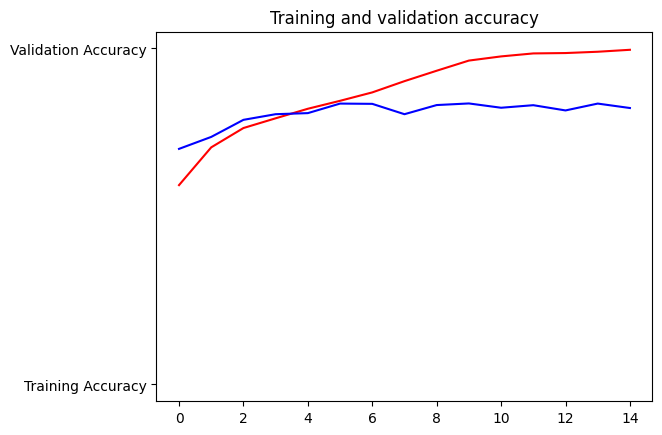

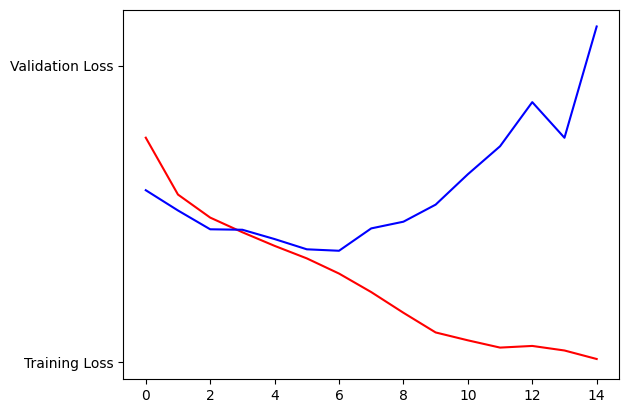

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [18]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>